In [5]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 18})

In [6]:
#column_names = ['timeA','VA']
#dataA = pd.read_csv('A/CH3.CSV', skiprows=1, names=column_names)
#column_names = ['timeAgen','VAgen']
#dataAgen = pd.read_csv('A/CH1.CSV', skiprows=1, names=column_names)


FULLDATA = pd.DataFrame({'A' : []})

frames = []
voltages = [2,5,10,15,20,25,30]
channels = [1,2,3,5]
for i in voltages:
    for j in channels:
        location = 'VoltageFalltimeTests/'+str(i)+'V/CH'+str(j)+'.CSV'
        timelabel = 'time_'+str(i)+"V_CH"+str(j)
        vlabel = 'V_'+str(i)+"V_CH"+str(j)
        ColumnNames = [timelabel,vlabel]
        dataA = pd.read_csv(location,skiprows=1,names=ColumnNames)
        frames = [FULLDATA,dataA]
        FULLDATA=pd.concat(frames,axis=1)
        
FULLDATA =FULLDATA.drop('A',1)

cnnames = FULLDATA.columns.get_values()
for k in cnnames:
    if k.startswith('time') == True:
        #print(k)
        FULLDATA[k] = FULLDATA[k] * 1E6

FULLDATA


,time_2V_CH1,V_2V_CH1,time_2V_CH2,V_2V_CH2,time_2V_CH3,V_2V_CH3,time_2V_CH5,V_2V_CH5,time_5V_CH1,V_5V_CH1,...,time_25V_CH5,V_25V_CH5,time_30V_CH1,V_30V_CH1,time_30V_CH2,V_30V_CH2,time_30V_CH3,V_30V_CH3,time_30V_CH5,V_30V_CH5
0,-3.2000,9.705000,-3.2000,1.807,-3.2000,2.490,-1.2000,1.904,-3.2000,9.76400,...,-1.2000,25.05,-3.2000,9.764000,-3.2000,30.62,-3.2000,30.42,-1.2000,30.42
1,-3.1992,9.764000,-3.1992,1.709,-3.1992,2.295,-1.1996,2.197,-3.1992,9.76400,...,-1.1996,25.15,-3.1992,9.686000,-3.1992,30.62,-3.1992,30.52,-1.1996,30.52
2,-3.1984,9.744000,-3.1984,1.904,-3.1984,2.002,-1.1992,2.002,-3.1984,9.78300,...,-1.1992,25.24,-3.1984,9.764000,-3.1984,30.22,-3.1984,30.32,-1.1992,30.52
3,-3.1976,9.803000,-3.1976,1.807,-3.1976,2.197,-1.1988,1.904,-3.1976,9.78300,...,-1.1988,25.54,-3.1976,9.744000,-3.1976,30.42,-3.1976,30.13,-1.1988,30.52
4,-3.1968,9.783000,-3.1968,1.807,-3.1968,2.100,-1.1984,2.002,-3.1968,9.80300,...,-1.1984,25.24,-3.1968,9.744000,-3.1968,30.42,-3.1968,30.22,-1.1984,30.62
5,-3.1960,9.744000,-3.1960,2.100,-3.1960,2.100,-1.1980,2.197,-3.1960,9.76400,...,-1.1980,25.54,-3.1960,9.803000,-3.1960,30.62,-3.1960,30.52,-1.1980,30.71
6,-3.1952,9.744000,-3.1952,1.807,-3.1952,2.002,-1.1976,2.490,-3.1952,9.82200,...,-1.1976,25.63,-3.1952,9.744000,-3.1952,30.52,-3.1952,30.13,-1.1976,30.52
7,-3.1944,9.783000,-3.1944,2.002,-3.1944,2.002,-1.1972,2.393,-3.1944,9.74400,...,-1.1972,25.34,-3.1944,9.783000,-3.1944,30.13,-3.1944,30.71,-1.1972,30.52
8,-3.1936,9.783000,-3.1936,1.807,-3.1936,2.197,-1.1968,2.002,-3.1936,9.76400,...,-1.1968,25.34,-3.1936,9.803000,-3.1936,30.52,-3.1936,30.22,-1.1968,30.42
9,-3.1928,9.803000,-3.1928,1.904,-3.1928,2.197,-1.1964,2.197,-3.1928,9.78300,...,-1.1964,25.44,-3.1928,9.783000,-3.1928,30.71,-3.1928,30.42,-1.1964,30.22


In [30]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)

def plotfalltime(HVS): ### HVS=[0,1,2,3]
    if HVS == 0: 
        channel = 2
        label = '-1'
    if HVS == 1: 
        channel = 3
        label = '+1'
    if HVS ==3:
        channel = 5
        label = '+2'
    if HVS == 2: 
        return "No Data Yet!"
    
    voltages = [2,5,10,15,20,25,30]
    for i in voltages:
        for j in channels:
            timelabel = 'time_'+str(i)+"V_CH"+str(j)
            vlabel = 'V_'+str(i)+"V_CH"+str(j)
            vlabelshort = str(i)+'V'
            Title = 'Falltime vs. Voltage, HVS' + label

            if i==2 and j==1:
                ax=FULLDATA.plot(timelabel,vlabel,title=Title,label='Square Wave')
            elif j==channel:
                FULLDATA.plot(timelabel,vlabel,label=vlabelshort,ax=ax)
            else:
                continue
    plt.xlim([-.2,1])
    plt.xlabel("time (usec)")
    plt.ylabel('V')
    #plt.savefig('CompareRisetimes_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
    return plt.show()


def func(x, a, c,d):
    #return a*np.exp(-x**2/c +b)+d
    #return a*np.log(x*c+b)+d
    return (a*(np.exp(d - (x/c))))

def plotfalltimesingle(HVS): ### HVS=[0,1,2,3]
    if HVS == 0: 
        channel = 2
        label = '-1'
    if HVS == 1: 
        channel = 3
        label = '+1'
    if HVS ==3:
        channel = 5
        label = '+2'
    if HVS == 2: 
        return "No Data Yet!"
    tau = np.empty((0,2), float)
    print (tau)

    voltages = [30]#[2,5,10,15,20,25,30]
    for voltage in voltages:
        j = channel
        timelabel = 'time_'+str(i)+"V_CH"+str(j)
        vlabel = 'V_'+str(i)+"V_CH"+str(j)
        vlabelshort = str(i)+'V'
        Title = 'Falltime vs. Voltage, HVS' + label + ', V=' + str(voltage)

        #FitData = FULLDATA[(FULLDATA[timelabel]>= 0.0) & (FULLDATA[timelabel]<=1)]
        FitData = FULLDATA[(FULLDATA[vlabel]>=(-1)*voltage-1) & (FULLDATA[vlabel]<=voltage-1)]


        #np.polyfit(np.log(FULLDATA[timelabel]), FULLDATA[vlabel], 1)
        popt, pcov = curve_fit(func, FitData[timelabel], FitData[vlabel],bounds=(0, [35, 1.0,5]))
        print (popt)
        #print (pcov)

        #popt = [30.0, .1 ,2]
        ax=FitData.plot(timelabel,vlabel,title=Title)#,label= vlabelshort)

        plt.plot(FULLDATA[timelabel],func(FULLDATA[timelabel],*popt))

        
        
        #if voltage ==2:
        #    stau = [[voltage,popt[1],pcov[1,1]]]
        #else:
        #    stau = np.append(stau, [[voltage,popt[1],pcov[1,1]]], axis=0)
        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        tau =  '%s' % float('%.3g' % popt[1])
        tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        
        
        #plt.savefig('CompareRisetimes_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
        
        
    #print (stau)
    #plt.errorbar(stau[:,0],stau[:,1]*1000,yerr=stau[:,2]*1000,fmt='o')
    ##plt.xlim([-.1,2])
    #plt.ylim([30,120])
    #plt.xlabel("Voltage")
    #plt.ylabel('tau (ns)')
    #plt.title('Falltimes Vs Voltage, HVS'+label)
    #plt.legend().set_visible(False)
    #print (tau)
    #plt.savefig('RisetimeVsVoltage_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
    return plt.show()

[]
[ 34.99999999   0.05428777   5.        ]


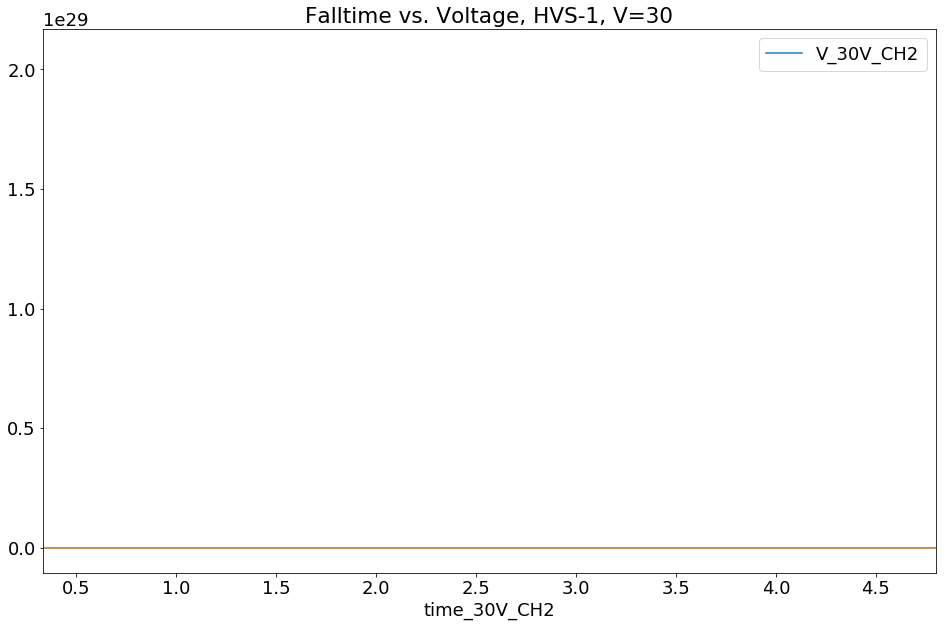

In [31]:
plotfalltimesingle(0)

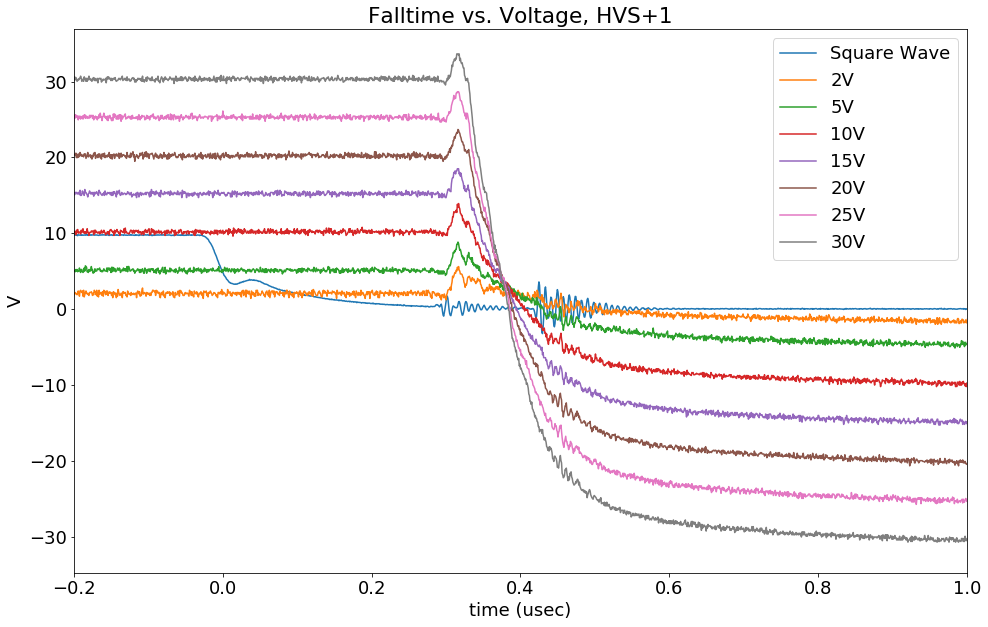

In [20]:
plotfalltime(1)

In [21]:
plotfalltime(2)

'No Data Yet!'

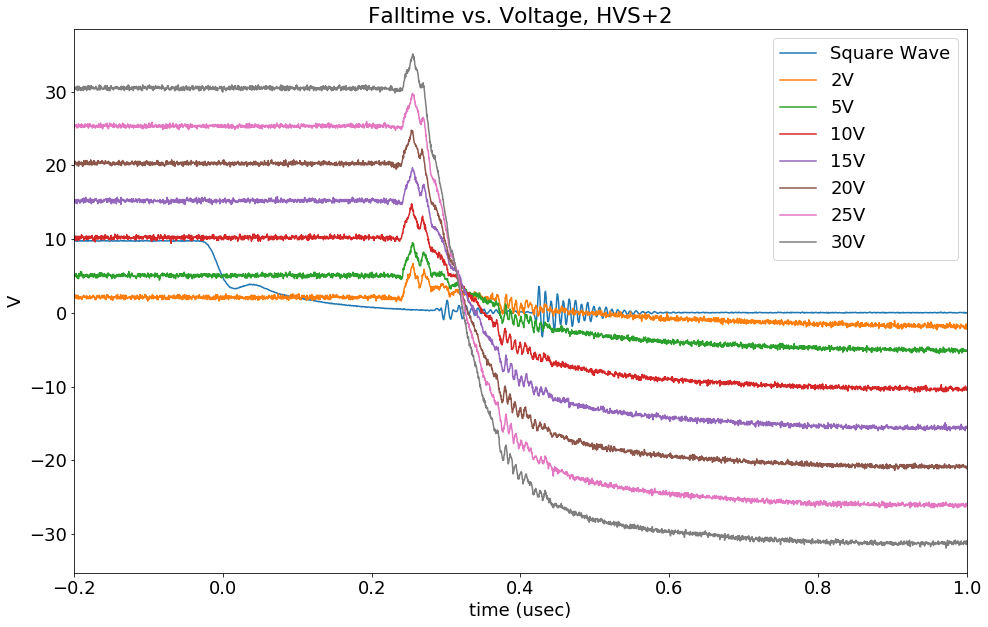

In [22]:
plotfalltime(3)

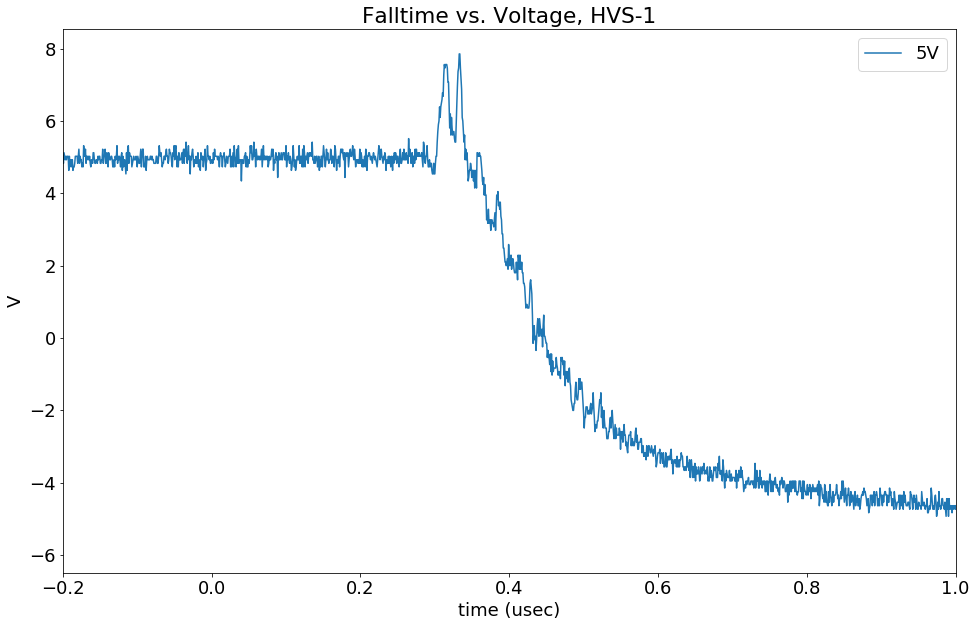

In [25]:
plotfalltimesingle(0,5)